<a href="https://colab.research.google.com/github/koohaoming/SnapItFindIt/blob/main/CNN_Keras_Feature_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Feature Extractor

Course: A Project Submission for ISY5004 Intelligent Sensing Systems
Website: https://www.iss.nus.edu.sg/stackable-certificate-programmes/graduate-certificate/artificial-intelligence/graduate-certificate-in-intelligent-sensing-systems

Contact: Koo Haoming, Jensen Wong, Lee Ren Xiang, Low Yue Sheng

Email: haomingkoo@gmail.com

# Objective
In this Python Script, we will perform the following tasks

- Data Exploration: Visualisation of the classes
- Data Preparation: Augementation, Resizing, Train/Test Dataset Split
- Feature Extraction: Keras Applications with state of the art deep learning models made available alongside pre-trained weights. 
- Performance Metrics: Top-1 Accuracy, Top-1 Precision,Top-5 Accuracy, Top-5 Precision, Mean Average Precision, F1 Scoring
- Evaluation: Accuracy vs Neural Network Parameters, Visualization of the Top 5 retrivals

# Installation guideline
- Open Anaconda Prompt

- Append the channel `conda-forge` into your conda configuration.

`conda config --append channels conda-forge`

- Create a new virtual environment `rtavs` or install additional packages in your own environment

**[Windows, CPU version]**

`conda create -n rtavs python=3.6 numpy=1.15.1 opencv=3.4.2 matplotlib=2.2.3 tensorflow=2.4.1 scipy=1.1.0 scikit-learn=0.19.1 spyder=3.3.2 yaml=0.1.7 keras=2.2.4 pillow=5.4.1 notebook=5.7.4 pandas=0.24.2 h5py=2.8.0`

**[Windows, GPU version, CUDA 9.0]**

`conda create -n rtavs python=3.6 numpy=1.15.1 opencv=3.4.2 matplotlib=2.2.3 tensorflow-gpu=1.12.0 scipy=1.1.0 scikit-learn=0.19.1 spyder=3.3.2 yaml=0.1.7 keras-gpu=2.2.4 pillow=5.4.1 notebook=5.7.4 pandas=0.24.2 h5py=2.8.0`




Copyright (c) <2021> <Koo Haoming, Jensen Wong, Lee Ren Xiang, Low Yue Sheng>

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


## Loading the respective packages and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:


In [161]:
import re
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import random
import cv2
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns

# Check GPU setup in Colab
import tensorflow as tf

# Silence the tensorflow warning message
tf.get_logger().setLevel('ERROR')

# Check GPU coinfiguration in Colab (T4 GPU)
print("Tensorflow version: ", tf.__version__)
print(tf.test.gpu_device_name())
# Your expected output will be '/device:GPU:0'

Tensorflow version:  2.4.1
/device:GPU:0


## Locating your files

We will be working with google drive for this project:

- Mount the google drive 
- Change directory after /content/gdrive/My Drive/to_your_folder/
-Display the contents


In [162]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/isy5004_project/')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'Augmentation Project (1).ipynb'
'Augmentation Project (2).ipynb'
'Augmentation Project.ipynb'
 augmented_image2
'background removal.ipynb'
 best_inception_model.h5
 CNN-Model-Distance.ipynb
'CNN Modeling.ipynb'
'Copy of Keras_Feature_Extractor_MainModel.ipynb'
 data
'Detectron2 YS.ipynb'
 final_augmentated_production
 final_augmented_production
 hipvan_image
 ikea_image
'ikea scrapper.ipynb'
 image_search2.ipynb
 input.jpg
 Keras_Extracting_For_Model.ipynb
 Keras_Feature_Extractor.ipynb
 Keras_Feature_Extractor_MainModel.ipynb
 Mask_RCNN
 mask_rcnn_coco.h5
 models
 object_detection_classes_yolov3.txt
'Object Detection with BB and object counting.ipynb'
'Object Detection with BB.ipynb'
 production_ready_code
 telegram_bot.ipynb
 temp
 test_df_ikea_hipvan.csv
 train_df_ikea_hipvan.csv
 trainset
 trainset2
'Unsuccessful Background Removal.ipynb'
 Untitled0.ip

## Exploration of the data

Let's load in a dataset of your preferred choice and get the path to the images

The dataset we are using has been gathered from stock photos from Ikea and Hipvan for personal use, such as in this practice module. The authors do not own any of the stock images and hence will not be providing the dataset for use. A tutorial will be shared on how to prepare your own dataset instead! 

The dataset we are using has the following structure
```


```




In [163]:
#replace image_folder_name list with your respect dataset
image_folder_name = ['hipvan_image','ikea_image']
subfolder_name = []
image_file_path = []

#let's iterate through the folders to find the path to our files!
for image_folder in image_folder_name:
  for subfolder in os.listdir(image_folder):
    file_list = os.listdir(image_folder + '/' + subfolder)
    for file in file_list:
        temp_image_path = image_folder + '/' + subfolder + '/' + file
        image_file_path.append(temp_image_path)
        subfolder_name.append(subfolder)

# Prints to tell how many classes, and total images available
print("DataSet: %d classes, %d images" % (len(set(subfolder_name)), len(image_file_path)))

#creates a dataframe with category as labels
image_file_path_df = pd.DataFrame({'image_file_path': image_file_path})

#Subfolder is named after category
image_file_path_df['label'] = subfolder_name

DataSet: 154 classes, 23891 images


##Visualization of the Overall Dataset

Here we can see that we have an unblanced label and is expected from a multi-label problem where one an item can fall into more than one category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


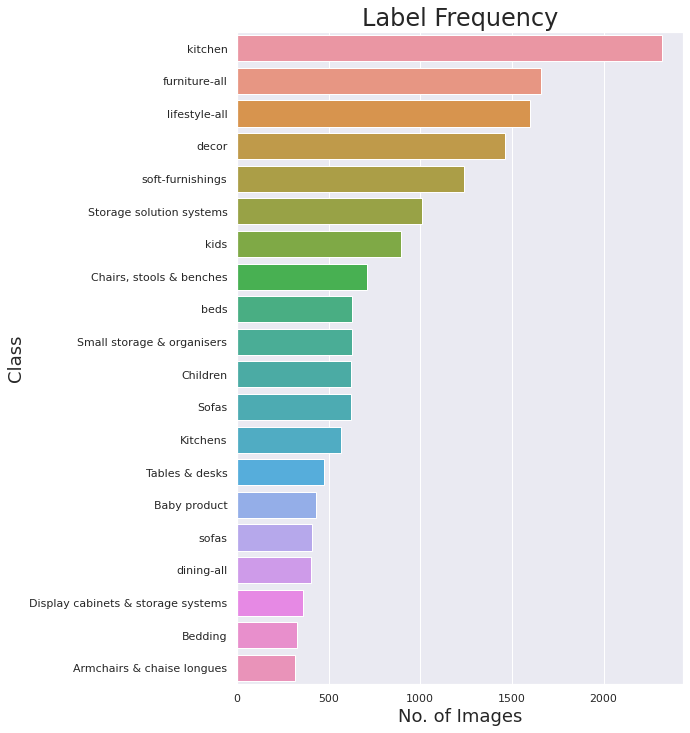

In [167]:
#Visualization of the distribution of images by class

categories = image_file_path_df.label.value_counts().index.tolist()
sns.set(font_scale = 1)
plt.figure(figsize=(8,24))
ax= sns.barplot(image_file_path_df.label.value_counts(),categories)

plt.title("Label Frequency", fontsize=24)
plt.ylabel('Class', fontsize=18)
plt.xlabel('No. of Images', fontsize=18)

plt.show()


##Visualization of the Multiple Labels problem

The team has tried using class weights to compensate for unbalanced class but was not able to correct and improve the models performance. Nevertheless, it can be seen that there are very few images that have more than 5 labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


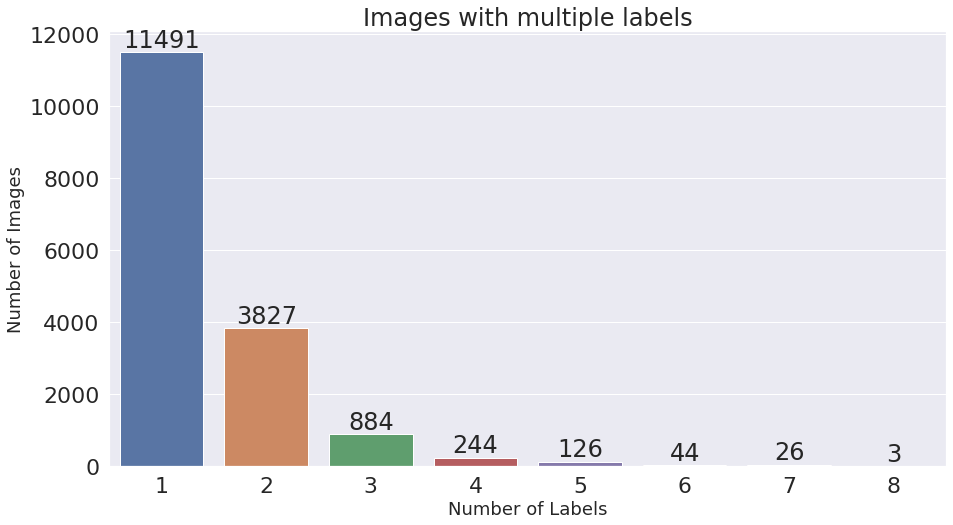

In [168]:
#create a copy of the data_set to calculate how many multiple labels
data_set = image_file_path_df.copy()
data_set['image'] = data_set.image_file_path.str.split(pat = '/').str[2]
# data_set['image'] = data_set.image.str.split(pat = '_').str[0]
data_set = pd.melt(data_set,id_vars=['image'],value_vars=['label'])

cat_multi_labels = data_set.image.value_counts().value_counts().index.tolist()
mutilabel_counts = data_set.image.value_counts().value_counts()
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(cat_multi_labels,mutilabel_counts)

plt.title("Images with multiple labels", fontsize=24)
plt.ylabel('Number of Images', fontsize=18)
plt.xlabel('Number of Labels', fontsize=18)

rects = ax.patches
labels = mutilabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

##Checking the Data Set Size

Always good to visualize how large the datasets are before processing them. This takes awhile to run, so only run it if you have the time

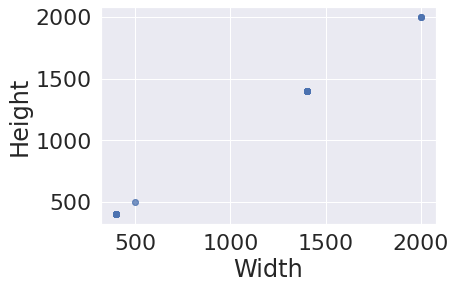

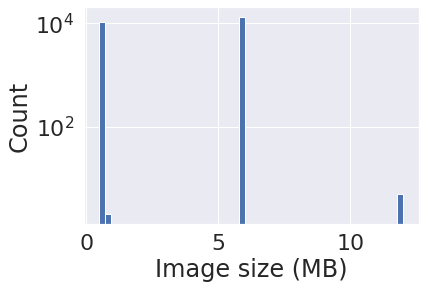

In [173]:
height, width, size = np.empty(len(image_file_path_df)), np.empty(len(image_file_path_df)), np.empty(len(image_file_path_df)) 
for i, img_filepath in image_file_path_df['image_file_path'].iteritems():
    w, h, _ = cv2.imread(img_filepath).shape
    width[i], height[i], size[i] = w, h, w * h * 3 * 1E-6
plt.scatter(width, height, alpha=0.5)
plt.xlabel('Width'); plt.ylabel('Height'); plt.show()
plt.hist(size, bins=50, log=True)
plt.xlabel('Image size (MB)');
plt.ylabel('Count');


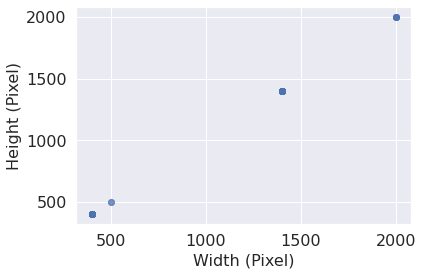

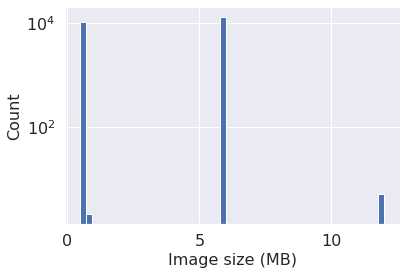

In [184]:
plt.scatter(width, height, alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Width (Pixel)',fontsize = 16); plt.ylabel('Height (Pixel)',fontsize = 16); plt.show()
plt.hist(size, bins=50, log=True)
plt.xlabel('Image size (MB)',fontsize = 16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Count',fontsize = 16);

## Splitting the train/test sets 

Here, we will be preparing our train/test sets for performance evaluation which willbe used for selection of the ideal model for our image retrival use

- Drop classes less than 5 objects as they will cause some trouble later during the splitting of the dataset.
- Split the data into 80/20 Train/Test 


In [174]:
#Dropping of classes less than 5 objects
file_df = pd.DataFrame(list(zip(image_file_path, subfolder_name)),
               columns =['path', 'labels'])
filtered_file_list = file_df.groupby('labels').count().path.reset_index()[file_df.groupby('labels').count().path.reset_index().path > 5].labels.to_list()
updated_file_df=file_df[file_df['labels'].isin(filtered_file_list)]


#Splitting of the Dataset
train_image_file_list, test_image_file_list, train_label, test_label = train_test_split(updated_file_df.path, updated_file_df.labels, 
                                                                                       test_size=0.2, random_state=42, stratify = updated_file_df.labels,
                                                                                       shuffle=True)

## Checkpoint 1: Saving of the train/test sets

Always nice to have a quick pause and save your data as the order of the train/test labels matter!


In [ ]:
np.save('data/hip_ikea_train_list_new.npy', train_image_file_list)
np.save('data/hip_ikea_test_list_new.npy', test_image_file_list)
np.save('data/hip_ikea_train_label_new.npy', train_label)
np.save('data/hip_ikea_train_label_new.npy', test_label)

## Image Augmentation 

In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better. 

With reference to the Keras Blog Post by Francois Chollet (2016) Building powerful image classification models using very little data

- rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
-width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
-shear_range is for randomly applying shearing transformations
-zoom_range is for randomly zooming inside pictures
-horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
-fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

To note that we are doing augmentation offline instead of during the model training as we want to keep the augmentated images for feature extraction in the later applications

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

## Image Resizing and running the Augmentation Portion

The largest image size model that we will be using is the EfficientNetb7, that uses (600,600,3). However, you can change this to smaller sizes for your usage. A common size which you will later encounter is (224,224,3). Do note that if the model is running slow, you might want to reduce the size to speed things up!

Based on the way the data is prepared, we are going to label the images with an id and store it in their respective label folders


In [ ]:
for file in train_image_file_list:
  if file.split('/')[0] == 'hipvan_image':
    temp_id = file.strip('.jpg').split('_')[-2]
    # print(temp_id)
    # id.append(temp_id)
    label = file.split('/')[1]
    img = image.load_img(file,target_size=(600, 600))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    path = os.path.join('trainset2/hipvan_image/'+label)
    os.makedirs(path,exist_ok = True)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='trainset2/hipvan_image/'+label, save_prefix=temp_id, save_format='jpg'):
        i += 1
        if i > 4:
            break  # otherwise the generator would loop indefinitely

  elif file.split('/')[0] == 'ikea_image':
    temp_id = file.strip('.jpg').split('_')[-1]
    # print(temp_id)
    # id.append(temp_id)
    label = file.split('/')[1]
    img = image.load_img(file,target_size=(600, 600))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    path = os.path.join('trainset2/ikea_image/'+label)
    os.makedirs(path,exist_ok = True)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='trainset2/ikea_image/'+label, save_prefix=temp_id, save_format='jpg'):
        i += 1
        if i > 4:
            break  # otherwise the generator would loop indefinitely

    

## Rebuild the Image Database

After we have augmented the images, time to rebuild the database


In [7]:
image_folder_name = ['ikea_image','hipvan_image']
database_name = []
file_name = []
train_label = []
train_file_path = []
id = []

for image_folder in image_folder_name:
  for subfolder in os.listdir('trainset2/'+image_folder):
    file_list = os.listdir('trainset2/'+image_folder + '/' + subfolder)
    for file in file_list:
        temp_image_path = 'trainset2/' +image_folder + '/' + subfolder + '/' + file
        train_file_path.append(temp_image_path)
        database_name.append(image_folder)
        train_label.append(subfolder)
        temp_id = file.strip('.jpg').split('_')[0]
        id.append(temp_id)

train_df = pd.DataFrame(list(zip(train_file_path,train_label,id,database_name)),
               columns =['path','label','id','dataset'])

train_df.to_csv ('data/train2_df_ikea_hipvan.csv', header=True)


image_folder_name = ['ikea_image','hipvan_image']
database_name = []
file_name = []
test_label = []
test_file_path = []
id = []

for file in test_image_file_list:
  if file.split('/')[0] == 'hipvan_image':
    temp_id = file.strip('.jpg').split('_')[-2]
    label = file.split('/')[1]
    test_label.append(label)
    id.append(temp_id)
    database_name.append('hipvan_image')

  elif file.split('/')[0] == 'ikea_image':
    temp_id = file.strip('.jpg').split('_')[-1]
    label = file.split('/')[1]
    test_label.append(label)
    id.append(temp_id)
    database_name.append('ikea_image')

test_df = pd.DataFrame(list(zip(test_image_file_list,test_label,id,database_name)),
               columns =['path','label','id','dataset'])

test_df.to_csv ('data/test2_df_ikea_hipvan.csv', header=True)



## Saving of the directories
Take note that this is extremely important to capture the order of the files


In [ ]:
train_image_file_list = train_df.path.tolist()
test_image_file_list = test_df.path.tolist()

train_df = pd.read_csv('data/train2_df_ikea_hipvan.csv')
test_df = pd.read_csv('data/test2_df_ikea_hipvan.csv')



## Keras Feature Extractor

Now that we have all the data prepared, lets get to the fun part. 

Running the following cell will request for a user_input that you can call to generate a headless model. What we mean by headless is that there is no classifer at the end of the neural network. Hence, what we will have is a feature vector that can be used for matching in an image retrival case.

Go ahead and key in a model you see. Such as xception, vgg16, inceptionv3, efficientnetb7. For more available models, do refer to the following link to get an idea of their performance on the imagenet.  https://keras.io/api/applications/

Few things to note, models with larger amount of parameters run much slower. 

In [112]:
user_input = input("Enter Model:").lower()
model_dict = {
  "xception": ["Xception", "299", "xception"],
  "vgg16": ["VGG16", "224", "vgg16"],
  "vgg19": ["VGG19", "224", "vgg19"],
  "resnet50": ["ResNet50", "224", "resnet"],
  "resnet101": ["ResNet101", "224", "resnet"],
  "resnet152": ["ResNet152", "224", "resnet"],
  "inceptionv3":  ["InceptionV3", "299", "inception_v3"],
  "mobilenet":  ["MobileNet", "224", "mobilenet"],
  "mobilenetv2":  ["MobileNetV2", "224", "mobilenet"],
  "densenet121":  ["DenseNet121", "224", "densenet"],
  "densenet169":  ["DenseNet169", "224", "densenet"],
  "densenet201":  ["DenseNet201", "224", "densenet"],
  "nasnetmobile":  ["DenseNet201", "224", "densenet"],
  "nasnetlarge":  ["DenseNet201", "224", "densenet"],
  "efficientnetb0":  ["EfficientNetB0", "224", "efficientnet"],
  "efficientnetb1":  ["EfficientNetB1", "240", "efficientnet"],
  "efficientnetb2":  ["EfficientNetB2", "260", "efficientnet"],
  "efficientnetb3":  ["EfficientNetB3", "300", "efficientnet"],
  "efficientnetb4":  ["EfficientNetB4", "380", "efficientnet"],
  "efficientnetb5":  ["EfficientNetB5", "456", "efficientnet"],
  "efficientnetb6":  ["EfficientNetB6", "528", "efficientnet"],
  "efficientnetb7":  ["EfficientNetB7", "600", "efficientnet"]
}

temp = model_dict[user_input]
keras_model = temp[0]
model_input_shape = temp[1]
model_application =temp[2]
print(temp)

try:
    exec(f"from tensorflow.keras.applications import {keras_model}")
    exec(f"from tensorflow.keras.applications.{model_application} import preprocess_input")
except Exception as e:
    print(e)

usermodel = eval(f"{keras_model}(weights='imagenet', include_top=False)")
usermodel.summary()

Enter Model:efficientnetb4
['EfficientNetB4', '380', 'efficientnet']
71688192/71686520 [==============================] - 3s 0us/step
Model: "efficientnetb4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_4 (Rescaling)         (None, None, None, 3 0           input_9[0][0]                    
__________________________________________________________________________________________________
normalization_4 (Normalization) (None, None, None, 3 7           rescaling_4[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None,

##Functions for Feature Extraction

The summary of the model has been plotted and that means you have succesfully loaded the model! 

In order to extract the features vectors for each image, we will be iterating through the path_list that was generated earlier.The conv_features are in 2D for the headless models presented above. 

In [113]:
def extract_feature_from_list(image_file_list, mode='sum'):
    all_feature = []
    for idx, eachFile in enumerate(image_file_list):
        if ((idx % 100) ==0 ):
            print("process %d/%d file" % (idx+1, len(image_file_list)))
        # print(eachFile)    
        img = image.load_img(eachFile, target_size=(int(model_input_shape), int(model_input_shape)))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        conv_features = usermodel.predict(x)
        if (mode == 'sum'):
            conv_features = np.sum(conv_features, axis=(1,2))
            conv_features = conv_features/np.linalg.norm(conv_features) # normalise features
        else:
            print('extract_feature_from_list: Wrong mode as input')
            break
        all_feature.append(conv_features)
    return all_feature

def extract_feature_from_image(image_list):
    all_feature = []
    # x = cv2.resize(image,(model_input_shape,model_input_shape), interpolation = cv2.INTER_AREA)
    # x = np.expand_dims(x, axis=0)
    # x = preprocess_input(x)
    img = image.load_img(image_list, target_size=(int(model_input_shape), int(model_input_shape)))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)   
    conv_features = usermodel.predict(x)
    conv_features = np.sum(conv_features, axis=(1,2))
    conv_features = conv_features/np.linalg.norm(conv_features) # normalise features
    all_feature.append(conv_features)
    
    return all_feature



##Performing the Feature Extraction

The earlier defined functions will be called and the feature vector of each image will be stored in numpy array which we can save for future uses!

In [20]:
train_df = pd.read_csv('data/train2_df_ikea_hipvan.csv')
test_df = pd.read_csv('data/test2_df_ikea_hipvan.csv')

In [41]:
# train_path_list = sample_train_df.path.tolist()
# test_path_list = sample_test_df.path.tolist()

In [114]:
# # Uncomment followings to re-calculate all features
# Extract features from training images
print('Extract features from training images')
train_augmented_features = extract_feature_from_list(train_path_list, 'sum')
np.save('data/train_augmented_features.npy', train_augmented_features)
print("train_augmented_features: (%d, %d)" % (len(train_augmented_features), train_augmented_features[0].shape[1]))

# Extract features from test images
print('Extract features from test images')
test_augmented_features = extract_feature_from_list(test_image_file_list, 'sum')
np.save('data/test_augmented_features.npy', test_augmented_features)

print("test_augmented_features: (%d, %d)" % (len(test_augmented_features), test_augmented_features[0].shape[1]))

Extract features from training images
process 1/5000 file
process 101/5000 file
process 201/5000 file
process 301/5000 file
process 401/5000 file
process 501/5000 file
process 601/5000 file
process 701/5000 file
process 801/5000 file
process 901/5000 file
process 1001/5000 file
process 1101/5000 file
process 1201/5000 file
process 1301/5000 file
process 1401/5000 file
process 1501/5000 file
process 1601/5000 file
process 1701/5000 file
process 1801/5000 file
process 1901/5000 file
process 2001/5000 file
process 2101/5000 file
process 2201/5000 file
process 2301/5000 file
process 2401/5000 file
process 2501/5000 file
process 2601/5000 file
process 2701/5000 file
process 2801/5000 file
process 2901/5000 file
process 3001/5000 file
process 3101/5000 file
process 3201/5000 file
process 3301/5000 file
process 3401/5000 file
process 3501/5000 file
process 3601/5000 file
process 3701/5000 file
process 3801/5000 file
process 3901/5000 file
process 4001/5000 file
process 4101/5000 file
process 

## Checkpoint 2: Loading of the Feature Vectors

Let's test out loading the extracted features:

In [117]:
train_all_feature = np.load('data/train_augmented_features.npy')
test_all_feature = np.load('data/test_augmented_features.npy')


## Defining the Performance Matrix

In [46]:

def cal_precision(input_file_name, result_file_name_list):
    num = 0
    input_class = input_file_name.split("/")[1]
    for result_file_name in result_file_name_list:
        result_class = result_file_name.split("/")[2]
        if (input_class == result_class):
            num = num+1
    return (num/len(result_file_name_list))

def cal_accuracy(input_file_name, result_file_name_list):
    result = 0
    input_class = input_file_name.split("/")[1]
    for result_file_name in result_file_name_list:
        result_class = result_file_name.split("/")[2]
        if (input_class == result_class):
            result = 1
            break
    return (result)

def cal_multi_label_precision(input_file_name, result_file_name_list):
  num = 0
  if input_file_name.split("/")[0] == 'hipvan_image':
    id = input_file_name.strip('.jpg').split('_')[-2]
    input_class = all_data[all_data.id == id].label.to_list()
    for result_file_name in result_file_name_list:
        result_class = result_file_name.split("/")[2]
        if result_class in input_class:
            num = num+1

  elif input_file_name.split("/")[0] == 'ikea_image':
    id = input_file_name.strip('.jpg').split('_')[-1]
    input_class = all_data[all_data.id == id].label.to_list()
    for result_file_name in result_file_name_list:
        result_class = result_file_name.split("/")[2]
        if result_class in input_class:
            num = num+1

  return (num/len(result_file_name_list))


def cal_multi_label_mAP(input_file_name, result_file_name_list):
  mAP = []
  num = 0
  result_cnt = 0
  if input_file_name.split("/")[0] == 'hipvan_image':
    id = input_file_name.strip('.jpg').split('_')[-2]
    input_class = all_data[all_data.id == id].label.to_list()
    for result_file_name in result_file_name_list:
        result_cnt = result_cnt+1
        result_class = result_file_name.split("/")[2]
        if result_class in input_class:
            num = num+1
        mAP.append(num/result_cnt)

  elif input_file_name.split("/")[0] == 'ikea_image':
    id = input_file_name.strip('.jpg').split('_')[-1]
    input_class = all_data[all_data.id == id].label.to_list()
    for result_file_name in result_file_name_list:
        result_cnt = result_cnt+1
        result_class = result_file_name.split("/")[2]
        if result_class in input_class:
            num = num+1
        mAP.append(num/result_cnt)

  return (sum(mAP)/num)


def cal_multi_label_accuracy(input_file_name, result_file_name_list):
  result = 0
  if input_file_name.split("/")[0] == 'hipvan_image':
    id = input_file_name.strip('.jpg').split('_')[-2]
    input_class = all_data[all_data.id == id].label.to_list()
    for result_file_name in result_file_name_list:
        result_class = result_file_name.split("/")[2]
        if result_class in input_class:
            result = 1
            break

  elif input_file_name.split("/")[0] == 'ikea_image':
    id = input_file_name.strip('.jpg').split('_')[-1]
    input_class = all_data[all_data.id == id].label.to_list()
    for result_file_name in result_file_name_list:
        result_class = result_file_name.split("/")[2]
        if result_class in input_class:
            result = 1
            break
  return (result)

def cal_vec_dist(vec1, vec2):
    '''
    Description: calculate the Euclidean Distance of two vectors
    '''
    return np.linalg.norm(vec1 - vec2)


## Concantenate of a master file

This is so that we can look up the multiple labels

In [28]:
all_data= pd.concat([train_df,test_df])

In [118]:
##test and evaluation
avg_precision = []
avg_accuracy = []
avg_multi_precision = []
avg_multi_accuracy = []
avg_mAP = []

top_return = 5

for i in range(len(test_all_feature)):
    dist_list = []
    if ((i % 200) ==0 ):
        print("process %d/%d file" % (i+1, len(test_all_feature)))
    for eachpic in range(len(train_all_feature)):
        dist = cal_vec_dist(test_all_feature[i], train_all_feature[eachpic])
        dist_list.append(dist)

    most_sim = np.array(dist_list)

    #choose the five nearest images of the given image 
    index = np.argsort(most_sim)[:top_return]
    input_file_name = test_path_list[i]
    result_file_name_list = []
    for j in range(len(index)):
        result_file_name_list.append(train_path_list[index[j]])
    avg_precision.append(cal_precision(input_file_name, result_file_name_list))
    avg_accuracy.append(cal_accuracy(input_file_name, result_file_name_list))
    avg_multi_precision.append(cal_multi_label_precision(input_file_name, result_file_name_list))
    avg_multi_accuracy.append(cal_multi_label_accuracy(input_file_name, result_file_name_list))
    # avg_mAP.append(cal_multi_label_mAP(input_file_name, result_file_name_list))
print("Top %d return, mean Precision: %.4f" % (top_return, np.array(avg_precision).mean()))
print("Top %d return, mean Accuracy: %.4f" % (top_return, np.array(avg_accuracy).mean()))
print("Top %d return, mean Multi Label Precision: %.4f" % (top_return, np.array(avg_multi_precision).mean()))
print("Top %d return, mean Multi Label Accuracy: %.4f" % (top_return, np.array(avg_multi_accuracy).mean()))


process 1/100 file
Top 5 return, mean Precision: 0.3600
Top 5 return, mean Accuracy: 0.7900
Top 5 return, mean Multi Label Precision: 0.4380
Top 5 return, mean Multi Label Accuracy: 0.8600


## Comparison of the models 

- Re-run from the Keras Feature Extractor sector to try various models and bench mark to see which model has the best performance

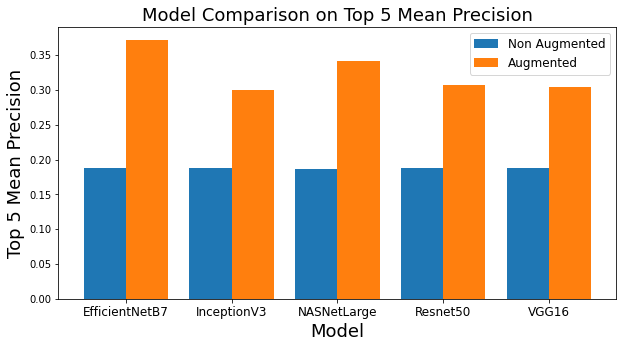

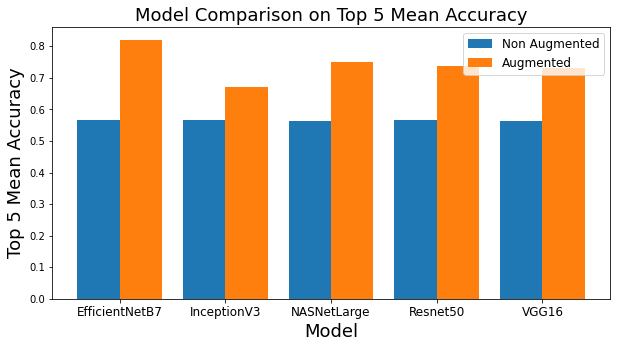

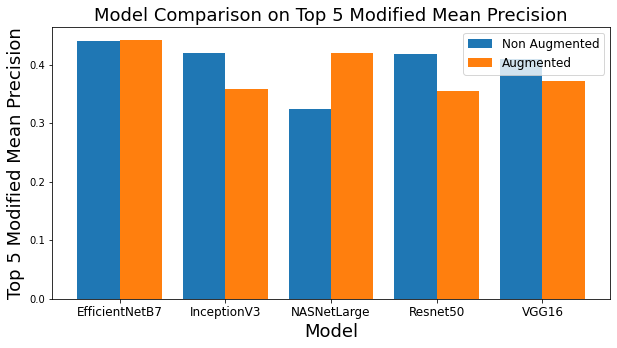

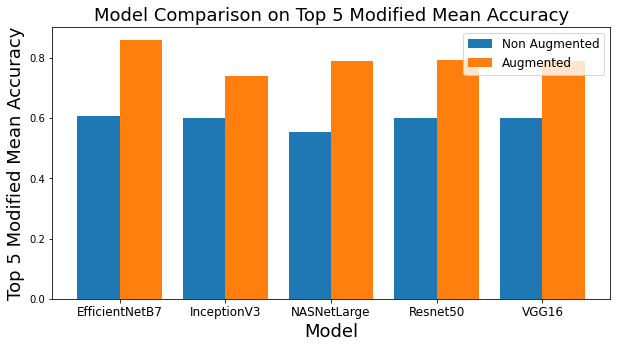

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = ['EfficientNetB7','InceptionV3','NASNetLarge','Resnet50','VGG16']
nonaugprecision5 = [0.1875,0.1879,0.1861,0.1879,0.1877]
augprecision5 = [0.372,0.30,0.342,0.3076,0.304]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(10,5))

plt.bar(X_axis - 0.2, nonaugprecision5, 0.4, label = 'Non Augmented')
plt.bar(X_axis + 0.2, augprecision5, 0.4, label = 'Augmented')
  
plt.xticks(X_axis, X, fontsize=12)
plt.xlabel("Model", fontsize=18)
plt.ylabel("Top 5 Mean Precision", fontsize=18)
plt.title("Model Comparison on Top 5 Mean Precision", fontsize=18)
plt.legend(fontsize=12)
plt.show()

X = ['EfficientNetB7','InceptionV3','NASNetLarge','Resnet50','VGG16']
nonaugaccuracy5 = [0.5649,0.5657,0.5617,0.5657,0.5645]
augaccuracy5 = [0.82,0.67,0.75,0.738,0.73]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(10,5))

plt.bar(X_axis - 0.2, nonaugaccuracy5, 0.4, label = 'Non Augmented')
plt.bar(X_axis + 0.2, augaccuracy5, 0.4, label = 'Augmented')
  
plt.xticks(X_axis, X, fontsize=12)
plt.xlabel("Model", fontsize=18)
plt.ylabel("Top 5 Mean Accuracy", fontsize=18)
plt.title("Model Comparison on Top 5 Mean Accuracy", fontsize=18)
plt.legend(loc="upper right", fontsize=12)
plt.show()

X = ['EfficientNetB7','InceptionV3','NASNetLarge','Resnet50','VGG16']
nonaugmodprecision5 = [0.4407,0.4198,0.3235,0.4187,0.4102]
augmodprecision5 = [0.442,0.358,0.42,0.3552,0.372]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(10,5))

plt.bar(X_axis - 0.2, nonaugmodprecision5, 0.4, label = 'Non Augmented')
plt.bar(X_axis + 0.2, augmodprecision5, 0.4, label = 'Augmented')
  
plt.xticks(X_axis, X, fontsize=12)
plt.xlabel("Model", fontsize=18)
plt.ylabel("Top 5 Modified Mean Precision", fontsize=18)
plt.title("Model Comparison on Top 5 Modified Mean Precision", fontsize=18)
plt.legend(loc="upper right", fontsize=12)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
X = ['EfficientNetB7','InceptionV3','NASNetLarge','Resnet50','VGG16']
nonaugmodaccuracy5 = [0.6086,0.6022,0.5534,0.6018,0.6022]
augmodaccuracy5 = [0.86,0.74,0.79,0.792,0.79]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(10,5))

plt.bar(X_axis - 0.2, nonaugmodaccuracy5, 0.4, label = 'Non Augmented')
plt.bar(X_axis + 0.2, augmodaccuracy5, 0.4, label = 'Augmented')
  
plt.xticks(X_axis, X, fontsize=12)
plt.xlabel("Model", fontsize=18)
plt.ylabel("Top 5 Modified Mean Accuracy", fontsize=18)
plt.title("Model Comparison on Top 5 Modified Mean Accuracy", fontsize=18)
plt.legend(loc="upper right", fontsize=12)
plt.show()

In [2]:
Models = ['EfficientNetB7','EfficientNetB6','EfficientNetB5','EfficientNetB4','InceptionV3','NASNetLarge','Resnet50','VGG16']
model_parameter = [66658687,43265143,30562527,19466823, 23851784,88949818,25613800,138357544] 
augprecision5 = [0.372, 0.36, 0.35, 0.347,0.30,0.342,0.3076,0.304]
augaccuracy5 = [0.82,0.76,0.75,0.73, 0.67,0.75,0.738,0.73]
augmodprecision5 = [0.442, 0.442, 0.4, 0.39,0.358,0.42,0.3552,0.372]
augmodaccuracy5 = [0.86,0.81,0.79,0.76, 0.74,0.79,0.792,0.79]

scatter_df = pd.DataFrame(list(zip(Models, model_parameter,augprecision5,augaccuracy5,augmodprecision5,augmodaccuracy5)),
               columns =['Models', 'model_parameter','augprecision5','augaccuracy5','augmodprecision5','augmodaccuracy5'])

sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.scatterplot(x="model_parameter", y="augprecision5",
              hue="Models",
              data=scatter_df,
              s=100).set_title('Top 5 Mean Precision vs Model Parameter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Parameters", fontsize=12)
plt.ylabel("Top 5 Mean Precision", fontsize=12)
plt.show()

sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.scatterplot(x="model_parameter", y="augaccuracy5",
              hue="Models",
              data=scatter_df,
              s=100).set_title('Top 5 Mean Accuracy vs Model Parameter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Parameters", fontsize=12)
plt.ylabel("Top 5 Mean Accuracy", fontsize=12)
plt.show()
# g.set(xscale="log");

sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.scatterplot(x="model_parameter", y="augmodprecision5",
              hue="Models",
              data=scatter_df,
              s=100).set_title('Top 5 Modified Mean Precision vs Model Parameter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Parameters", fontsize=12)
plt.ylabel("Top 5 Modified Mean Precision", fontsize=12)
plt.show()
# g.set(xscale="log");

sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.scatterplot(x="model_parameter", y="augmodaccuracy5",
              hue="Models",
              data=scatter_df,
              s=100).set_title('Top 5 Modified Mean Accuracy vs Model Parameter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Parameters", fontsize=12)
plt.ylabel("Top 5 Modified Mean Accuracy", fontsize=12)
plt.show()
# g.set(xscale="log");

NameError: ignored

## Feature Vector of Entire Data Set
- In order to be able to search for any object, it is time to image augmentate the entire dataset and extract the feature set from the augmentated image

In [ ]:
image_folder_name = ['hipvan_image','ikea_image']
# image_folder_name = ['ikea_image']
database_name = []
file_name = []
subfolder_name = []
image_file_path = []
id = []

for image_folder in image_folder_name:
  if image_folder == 'hipvan_image':
    for subfolder in os.listdir(image_folder):
      file_list = os.listdir(image_folder + '/' + subfolder)
      path = os.path.join('finale/'+image_folder+'/'+subfolder)
      os.makedirs(path,exist_ok = True)
    for file in file_list:
        temp_image_path = image_folder + '/' + subfolder + '/' + file
        image_file_path.append(temp_image_path)
        database_name.append(image_folder)
        file_name.append(file)
        subfolder_name.append(subfolder)
        temp_id = file.strip('.jpg').split('_')[-2]
        # print(temp_id)
        id.append(temp_id)
        img = image.load_img(temp_image_path,target_size=(600, 600))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # the .flow() command below generates batches of randomly transformed images
        # and saves the results to the `preview/` directory
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir='finale/'+image_folder+'/'+subfolder, save_prefix=temp_id, save_format='jpg'):
            i += 1
            if i > 4:
                break  # otherwise the generator would loop indefinitely

  elif image_folder == 'ikea_image':
    for subfolder in os.listdir(image_folder):
        file_list = os.listdir(image_folder + '/' + subfolder)
        path = os.path.join('finale/'+image_folder+'/'+subfolder)
        os.makedirs(path,exist_ok = True)
        for file in file_list:
          temp_image_path = image_folder + '/' + subfolder + '/' + file
          image_file_path.append(temp_image_path)
          database_name.append(image_folder)
          file_name.append(file)
          subfolder_name.append(subfolder)
          temp_id = file.strip('.jpg').split('_')[-1]
          # print(temp_id)
          id.append(temp_id)
          img = image.load_img(temp_image_path,target_size=(600, 600))
          x = image.img_to_array(img)
          x = np.expand_dims(x, axis=0)

          # the .flow() command below generates batches of randomly transformed images
          # and saves the results to the `preview/` directory
          i = 0
          for batch in datagen.flow(x, batch_size=1,
                                    save_to_dir='finale/'+image_folder+'/'+subfolder, save_prefix=temp_id, save_format='jpg'):
              i += 1
              if i > 4:
                  break  # otherwise the generator would loop indefinitely

image_folder_name = ['ikea_image','hipvan_image']
database_name = []
file_name = []
train_label = []
train_file_path = []
id = []

for image_folder in image_folder_name:
  for subfolder in os.listdir('finale/'+image_folder):
    file_list = os.listdir('finale/'+image_folder + '/' + subfolder)
    for file in file_list:
        temp_image_path = 'finale/' +image_folder + '/' + subfolder + '/' + file
        train_file_path.append(temp_image_path)
        database_name.append(image_folder)
        train_label.append(subfolder)
        temp_id = file.strip('.jpg').split('_')[0]
        id.append(temp_id)

train_df = pd.DataFrame(list(zip(train_file_path,train_label,id,database_name)),
               columns =['path','label','id','dataset'])

train_df.to_csv ('data/finale_df_ikea_hipvan.csv', header=True)


train_augmented_features = extract_feature_from_list(train_df.path.tolist(), 'sum')
np.save('data/finale_augmented_features.npy', train_augmented_features)
np.save('data/finale_augmented_features_label.npy', train_df.label.tolist())
np.save('data/finale_augmented_features_path.npy', train_df.path.tolist())
print("train_augmented_features: (%d, %d)" % (len(train_augmented_features), train_augmented_features[0].shape[1]))





## Performing an image retrival to check whether the code works

- In this example, I have chose to retrive an image from the training set but in reality, you can easily replace 

In [91]:
# train_df = pd.read_csv('train_df_ikea_hipvan.csv')

95301
95301


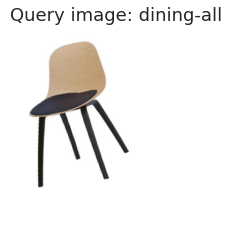

Query: trainset/hipvan_image/dining-all/92763_0_5311.jpg
Top 1 match: trainset/hipvan_image/dining-all/92763_0_5311.jpg, distance: 0.0000
Top 2 match: trainset/hipvan_image/furniture-all/92766_0_2458.jpg, distance: 0.3864
Top 3 match: trainset/hipvan_image/dining-all/82998_0_9367.jpg, distance: 0.4966
Top 4 match: trainset/hipvan_image/dining-all/86435_0_793.jpg, distance: 0.5678
Top 5 match: trainset/hipvan_image/furniture-all/100999_0_1046.jpg, distance: 0.5889


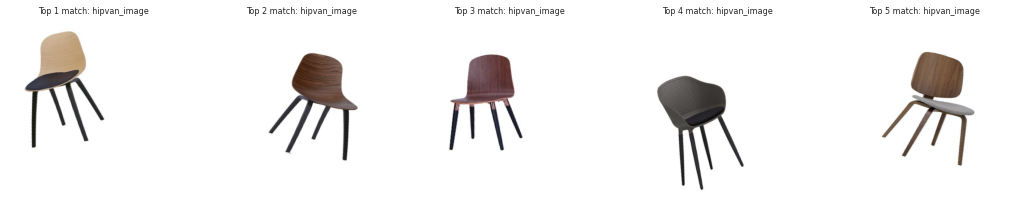

In [97]:

train_all_feature_efficientnetb7_model = np.load('data/finale_augmented_features.npy')
train_image_file_list = np.load('data/finale_augmented_features_path.npy',allow_pickle=True)
# train_image_file_list = train_df['path'].tolist()


print(len(train_all_feature_efficientnetb7_model))
print(len(train_image_file_list))

display_random_numer = random.randint(0, len(train_image_file_list)-1)
test_img_feature = extract_feature_from_image(train_image_file_list[display_random_numer])

top_return = 5
dist_list = []
final_filename = []
final_path = []
for eachpic in range(len(train_image_file_list)):
    dist = cal_vec_dist(test_img_feature, train_all_feature_efficientnetb7_model[eachpic])
    dist_list.append(dist)
    final_path.append(train_image_file_list[eachpic])
    final_filename.append(train_image_file_list[eachpic].split('/')[3].strip('.jpg').split('_')[0])
result = pd.DataFrame({'dist': dist_list, 'filename': final_filename, 'path': final_path})
result = result.sort_values(by='dist').drop_duplicates('filename')

dist_array = np.array(dist_list)
top_return = 5
index = np.argsort(dist_array)[:top_return]

plt.imshow(cv2.cvtColor(cv2.imread(train_image_file_list[display_random_numer]), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Query image: ' + train_image_file_list[display_random_numer].split("/")[2],fontsize=18)
plt.show()

print("Query: %s" % (train_image_file_list[display_random_numer]))

# Display results
plt.figure(figsize=(18,8))
for i in range(top_return):
    plt.subplot(1,top_return,i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(result.iloc[i].path), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Top ' + str(i+1) + ' match: ' + result.iloc[i].path.split("/")[1],fontsize=8)
    print("Top %d match: %s, distance: %.4f" % (i+1, result.iloc[i].path, result.iloc[i].dist))
plt.show()

